In [12]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Modelling
from sklearn.tree import DecisionTreeRegressor

# Metrics 
from sklearn.metrics import mean_squared_error


In [96]:
# Dataset
test = pd.DataFrame({'x':[0,1,2,2,3,5,6,7], 'x2':[5,10,15,20,25,30,35,40], 'y':[10,20,30,35,40, 60,80,70]})

### The Regression Tree

In [97]:
# This tree was set to not have cols > 5, it's implementation isn't 100% yet

def decision_tree(X_train, y, max_depth = 20, max_column = 5):
    '''Finds the spliting threshold for the root of the tree'''
    
    # Initializing 
    mse = []
    min_thresholds = []
    feats = []
    min_error = []
    
    # Step 1: Ensuring that X_train has a minimum of 5 columns
    n_columns = X_train.shape[1]
    if n_columns > 5:
        raise ValueError('Ensure that the no of columns in the training set is <= 5')
    else: 
        
    # Step 2: Getting the root split
        all_columns = X_train.columns
        
        # Looping through all columns to find best threshold
        for col in all_columns:
            df = X_train.sort_values(col)
            y = y.iloc[df.index]
            
            # Getting unique values in selected column in ascending order
            unique_values = sorted(df[col].unique())
            
            
            # Getting the threshold as the average between subsequent value after sorting the unique values
            thresholds = [(a+b)/2 for a, b in zip(unique_values[:len(unique_values)], unique_values[1:])]
            
            # Displaying threshold
            #print('Threshold Values', thresholds)
            
            # Looping through thresholds and spliting the dataset based on different thresholds to calculate loss and see 
            # which yields the lowest
            for threshold in thresholds:
                # Values in one part of threshold
                df1 = df[df[col]<=threshold]
                y1 = y.iloc[df1.index]
                
                # Getting the prediction for that node as average of values
                y1_pred = [np.mean(y1.values)]*len(y1)
                
                # Values in second part of threshold
                df2 = df[df[col]>threshold]
                y2 = y.iloc[df2.index]
                
                # Getting the prediction for that node as average of values
                y2_pred = [np.mean(y2.values)]*len(y2)
                                
                # THE MEAN SQUARED ERROR FOR EACH NODE SHOULD BE CALCULATED SEPERATELY and the weighted average can be 
                # computed it's actually called variance reduction
                
                mse_1 = mean_squared_error(y1, y1_pred)
                mse_2 = mean_squared_error(y2, y2_pred)
                mse_ = (len(y1)*mse_1+len(y2)*mse_2)/(len(y1)+len(y2))

                mse.append(mse_)
            #print('Error for each threshold',mse)  
            selected_threshold = thresholds[mse.index(min(mse))]
            lowest_error = mse[mse.index(min(mse))]
            
            min_thresholds.append(selected_threshold)
            min_error.append(lowest_error)
            feats.append(col)
            
            #print('{} is the selected threshold for root of tree because it gave lowest error of {}'
             #     .format(selected_threshold, lowest_error))
            #print(mse)
            mse = []
            
        min_thresh_index = min_error.index(min(min_error))
        initial_thres = min_thresholds[min_thresh_index]
        initial_feat = feats[min_thresh_index]
        
        # Joining X and Y for easy extraction
        data = pd.concat([X_train, y], axis = 1)
        
        #print(initial_thres, initial_feat, feats, min_thresholds)
        
        #print(y.columns.values[0])
        left_node_prediction = np.mean(data[data[initial_feat] <= initial_thres][y.columns.values[0]])
        right_node_prediction = np.mean(data[data[initial_feat] > initial_thres][y.columns.values[0]])
        
        return initial_feat, initial_thres, left_node_prediction, right_node_prediction
            

In [98]:
decision_tree(test[['x', 'x2']], test[['y']])

('x', 4.0, 27.0, 70.0)

[Text(0.5416666666666666, 0.9, 'x <= 4.0\nsquared_error = 530.859\nsamples = 8\nvalue = 43.125'),
 Text(0.3333333333333333, 0.7, 'x <= 1.5\nsquared_error = 116.0\nsamples = 5\nvalue = 27.0'),
 Text(0.16666666666666666, 0.5, 'x <= 0.5\nsquared_error = 25.0\nsamples = 2\nvalue = 15.0'),
 Text(0.08333333333333333, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 10.0'),
 Text(0.25, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 20.0'),
 Text(0.5, 0.5, 'x <= 2.5\nsquared_error = 16.667\nsamples = 3\nvalue = 35.0'),
 Text(0.4166666666666667, 0.3, 'x2 <= 17.5\nsquared_error = 6.25\nsamples = 2\nvalue = 32.5'),
 Text(0.3333333333333333, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 30.0'),
 Text(0.5, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 35.0'),
 Text(0.5833333333333334, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 40.0'),
 Text(0.75, 0.7, 'x <= 5.5\nsquared_error = 66.667\nsamples = 3\nvalue = 70.0'),
 Text(0.6666666666666666, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 60

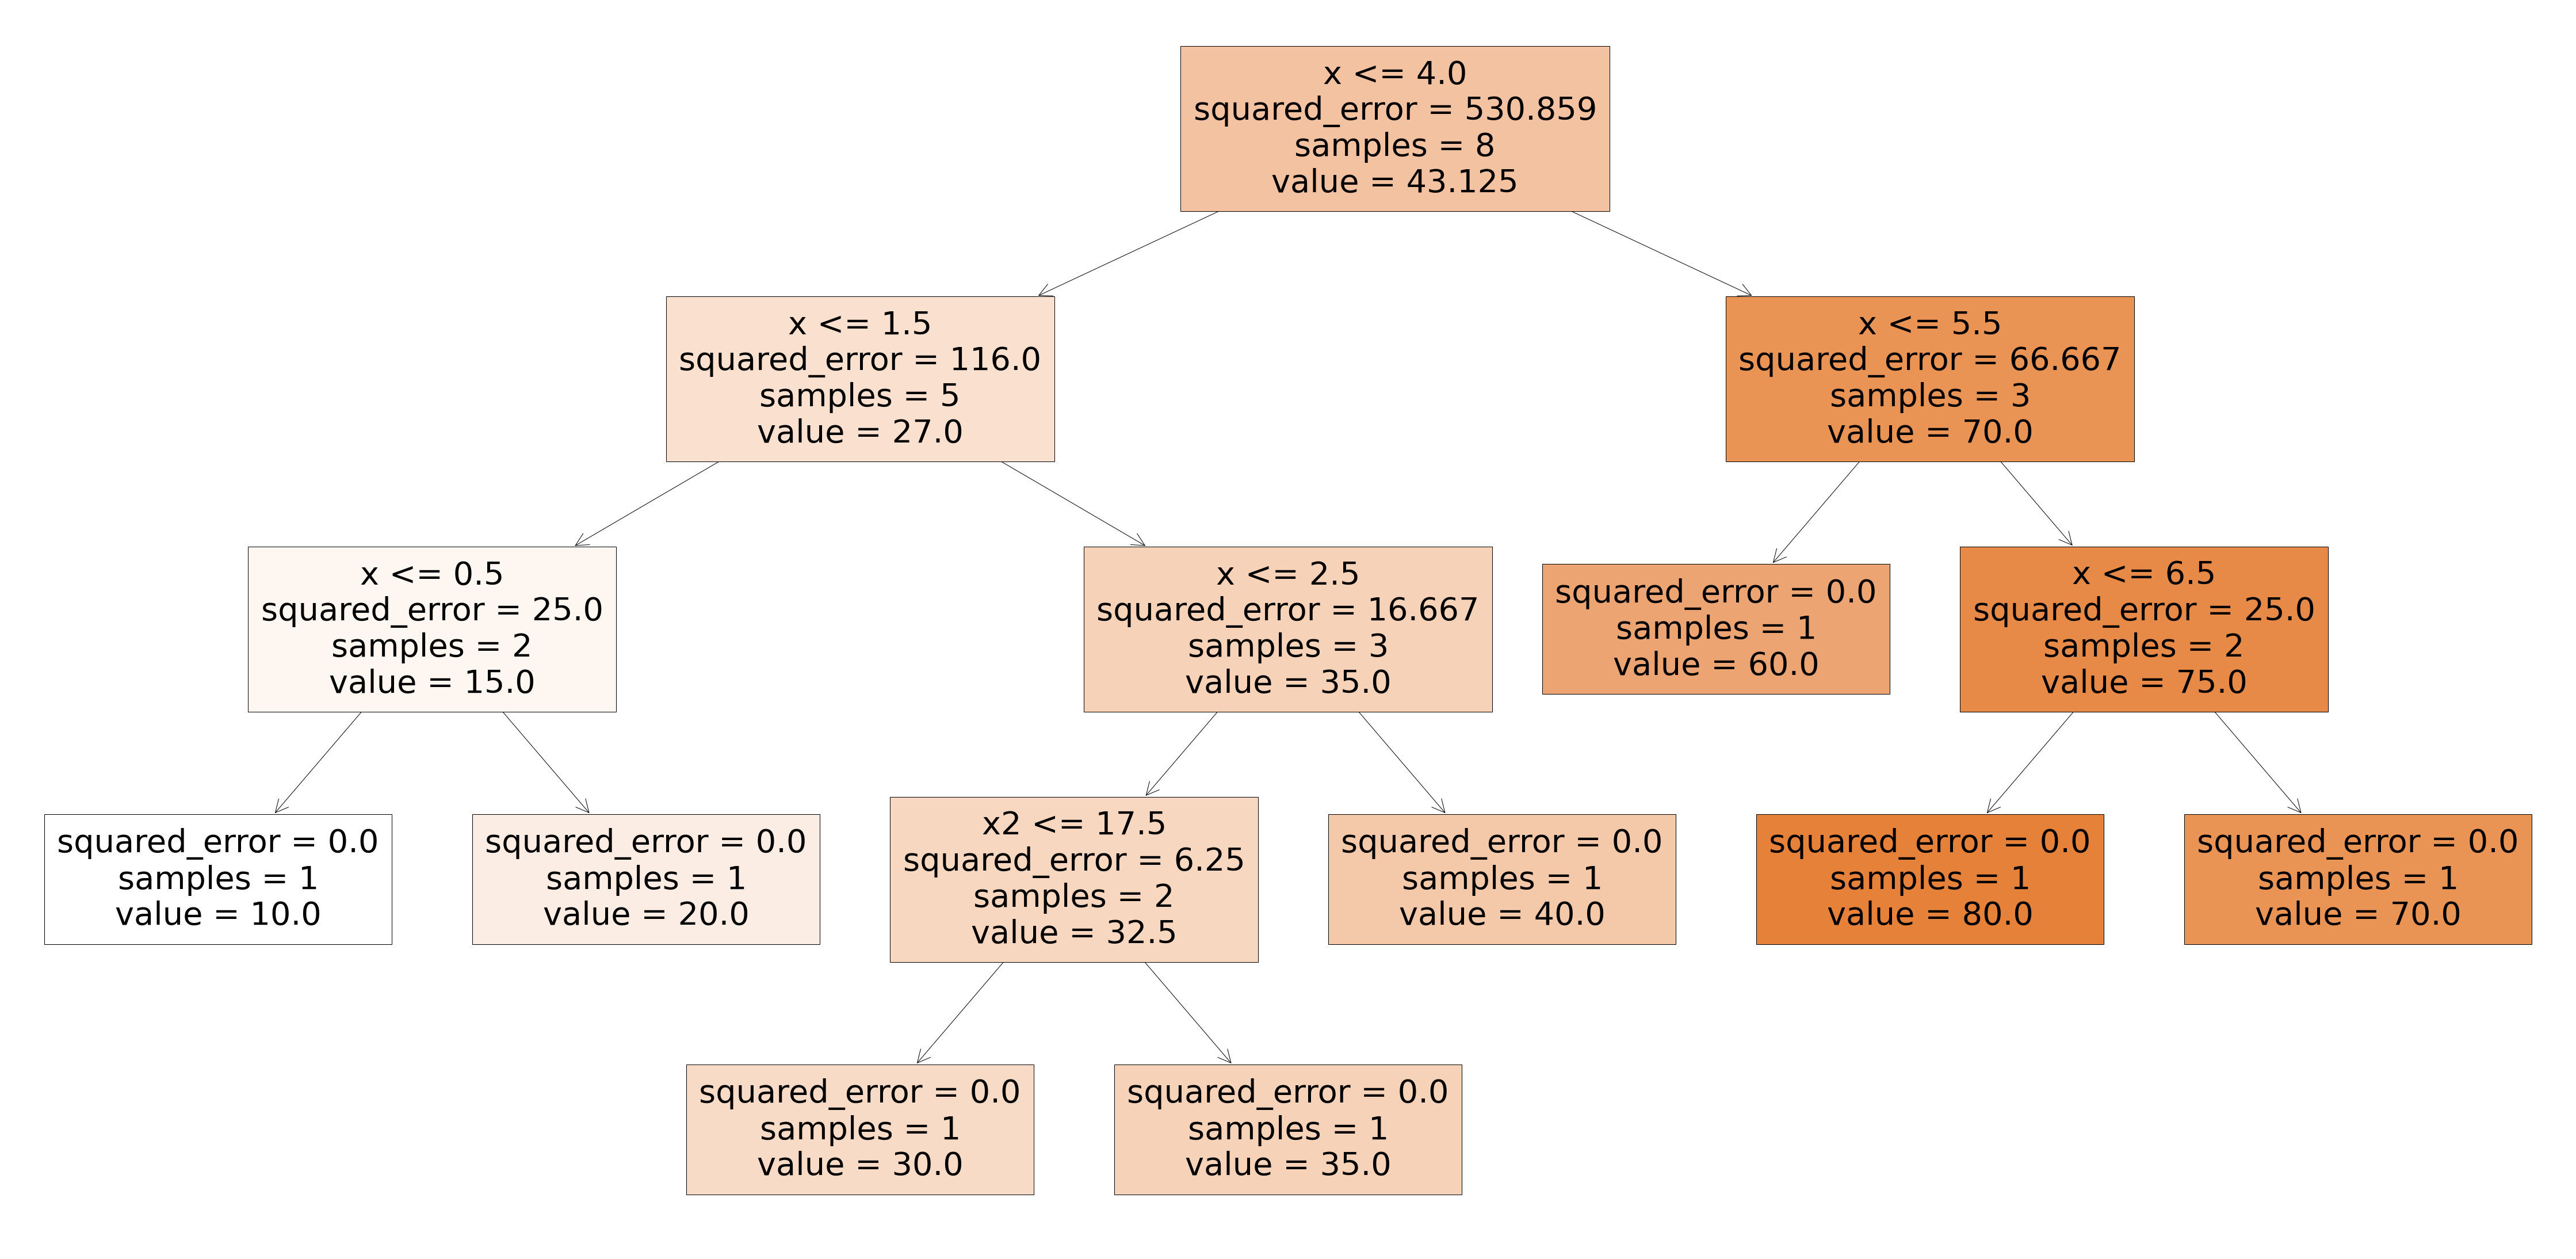

In [99]:
dec = DecisionTreeRegressor()
dec.fit(test[['x', 'x2']], test[['y']])
plt.figure(figsize=(80,40))
plot_tree(dec, feature_names = ['x', 'x2'], filled=True)

## Gradient Boosting
Pseudo Code
Step 1 - Make initial prediction as average of target
Step 2 - Calculate residual error for target variable
Step 3 - Fit tree with features and residual as target
Step 4 - Get prediction of residual x learning rate and add to initial prediction (average)
Step 5 - Compute Residual with new prediction and actual target 

In [171]:
def Gradient_Boosting(X_train, y, learning_rate= 0.001, n_trees = 10):
    # Step 1
    initial_pred = np.mean(y)
    
     # Joining X and Y for easy extraction
    data_1 = pd.concat([X_train, y], axis = 1)
    
    # Step 2
    data_1['error_init'] = y-initial_pred
    
    for iterations in range(n_trees):
        print('Fitting Tree {} ==============='.format(iterations))
        # Step 3
        temp_x = data_1.drop(['y', 'error_init'], axis= 1)
        temp_y = data_1[['error_init']]
        #print(temp_x)
        initial_feat, initial_thres, left_node_prediction, right_node_prediction = decision_tree(temp_x, temp_y)
        print(initial_feat, initial_thres, left_node_prediction, right_node_prediction)
        # Joining X and Y for easy extraction
        data = pd.concat([temp_x, temp_y], axis = 1)
        
        #print(initial_thres, initial_feat, feats, min_thresholds)
        
        left_new_y = data_1[data_1[initial_feat] <= initial_thres][y.columns.values[0]] + learning_rate*left_node_prediction
        right_new_y = data_1[data_1[initial_feat] > initial_thres][y.columns.values[0]] + learning_rate*right_node_prediction
        
        new_pred_y = pd.concat([left_new_y, right_new_y])
        data['pred'] = new_pred_y
        #print(data)
        data_1['error_init'] = data_1[y.columns.values[0]]-data['pred']
        print(data_1)
    

In [172]:
Gradient_Boosting(test[['x', 'x2']], test[['y']])

Fitting Tree 0 ===============
x 4.0 -16.125 26.875
   x  x2   y  error_init
0  0   5  10    0.016125
1  1  10  20    0.016125
2  2  15  30    0.016125
3  2  20  35    0.016125
4  3  25  40    0.016125
5  5  30  60   -0.026875
6  6  35  80   -0.026875
7  7  40  70   -0.026875
Fitting Tree 1 ===============
x 4.0 0.01612500000000061 -0.02687500000000161
   x  x2   y  error_init
0  0   5  10   -0.000016
1  1  10  20   -0.000016
2  2  15  30   -0.000016
3  2  20  35   -0.000016
4  3  25  40   -0.000016
5  5  30  60    0.000027
6  6  35  80    0.000027
7  7  40  70    0.000027
Fitting Tree 2 ===============
x 4.0 -1.6125000000144496e-05 2.687500000320142e-05
   x  x2   y    error_init
0  0   5  10  1.612500e-08
1  1  10  20  1.612500e-08
2  2  15  30  1.612500e-08
3  2  20  35  1.612500e-08
4  3  25  40  1.612500e-08
5  5  30  60 -2.687500e-08
6  6  35  80 -2.687500e-08
7  7  40  70 -2.687500e-08
Fitting Tree 3 ===============
x 4.0 1.6125000001920853e-08 -2.687500000320142e-08
   x  x2   